In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import urllib.request
from PIL import Image

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("train.csv", index_col=0)

In [3]:
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,,
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104805 entries, 1 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      104805 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 2   age                                   104805 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 4   DebtRatio                             104805 non-null  float64
 5   MonthlyIncome                         84024 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 7   NumberOfTimes90DaysLate               104805 non-null  int64  
 8   NumberRealEstateLoansOrLines          104805 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 10  NumberOfDependents                    102056 non-null  float64
dtype

In [5]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())
df.loc[df['age'] < 18, 'age'] = df['age'].median()
# df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] < 90] 
# df = df[df['NumberOfTimes90DaysLate'] < 90] 
# df = df[df['NumberOfTime60-89DaysPastDueNotWorse'] < 90] 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104805 entries, 1 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      104805 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 2   age                                   104805 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 4   DebtRatio                             104805 non-null  float64
 5   MonthlyIncome                         104805 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 7   NumberOfTimes90DaysLate               104805 non-null  int64  
 8   NumberRealEstateLoansOrLines          104805 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 10  NumberOfDependents                    104805 non-null  float64
dtype

<AxesSubplot:>

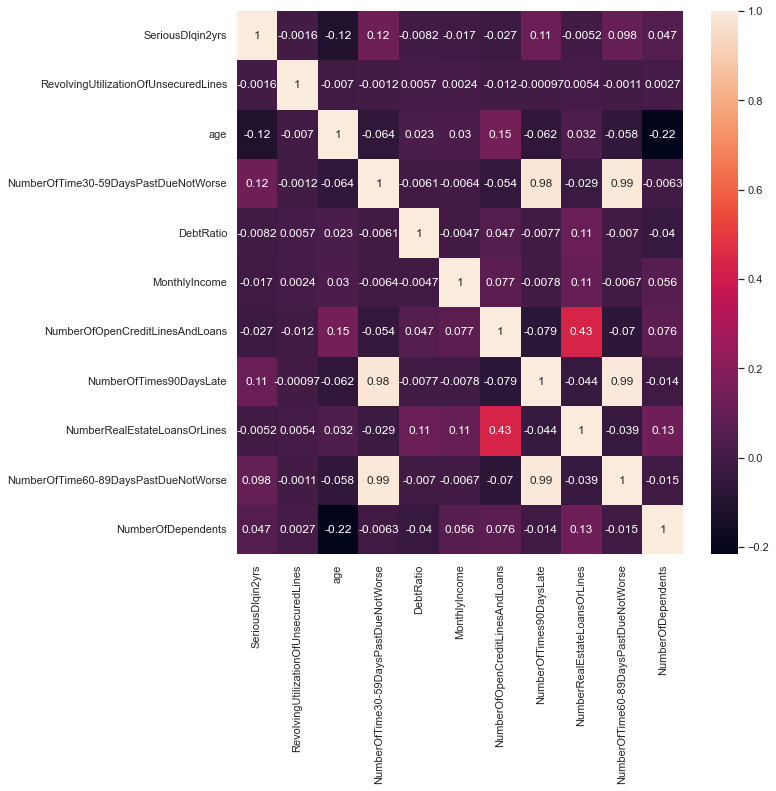

In [7]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(), annot=True)

-----------------------------------------------------------------------------------------------------------------

### Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [8]:
Target = 'SeriousDlqin2yrs'
Predictors = df.drop('SeriousDlqin2yrs', axis=1)


In [9]:
X = Predictors
y = df[Target]

### 2. Dividir X_train, X_test, y_train, y_test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(99564, 10)
(99564,)
(5241, 10)
(5241,)


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score


model_gbc = GradientBoostingClassifier()
param = {
    }
gs_model_gbc = GridSearchCV(model_gbc,
                            param,
                            cv = 10,
                            scoring = 'roc_auc',
                            verbose = 1,
                            n_jobs = -1)

gs_model_gbc.fit(X_train , y_train)
y_pred = gs_model_gbc.predict(X_test)

print('')
print('###### Gradient Boosting Classifier #######')
print('AUC : %.4f' % roc_auc_score(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits

###### Gradient Boosting Classifier #######
AUC : 0.5956


In [ ]:
from xgboost import XGBClassifier


model_xgbc = XGBClassifier()
param = {   
    }
gs_model_xgbc = GridSearchCV(model_xgbc,
                            param,
                            cv = 10,
                            scoring = 'roc_auc',
                            verbose = 1)

gs_model_xgbc.fit(X_train , y_train)
y_pred = gs_model_xgbc.predict(X_test)

print('')
print('###### Gradient Boosting Classifier #######')
print('AUC : %.4f' % roc_auc_score(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[13:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:32

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train , y_train)
param = {
    }
gs_model_rfc = GridSearchCV(model_rfc,
                            param,
                            cv = 10,
                            scoring = 'roc_auc',
                            verbose = 1,
                            n_jobs = -1)
gs_model_rfc.fit(X_train , y_train)
y_pred = model_rfc.predict(X_test)
print('')
print('###### Random Forest ######')
print('AUC : %.4f' % roc_auc_score(y_test, y_pred))


Fitting 10 folds for each of 1 candidates, totalling 10 fits

###### Random Forest ######
AUC : 0.5883


In [ ]:
from catboost import CatBoostClassifier

model_cbc = CatBoostClassifier()
model_cbc.fit(X_train, y_train)
param = {
    }
gs_model_cbc = GridSearchCV(model_cbc,
                            param,
                            cv = 10,
                            scoring = 'roc_auc',
                            verbose = 1,
                            n_jobs = -1)
gs_model_cbc.fit(X_train, y_train)
y_pred = gs_model_cbc.predict(X_test)
print('')
print('###### CatBoost Classifier ######')
print('AUC : %.4f' % roc_auc_score(y_test, y_pred))

Learning rate set to 0.073472
0:	learn: 0.5920540	total: 10.5ms	remaining: 10.5s
1:	learn: 0.5110154	total: 19.8ms	remaining: 9.88s
2:	learn: 0.4438420	total: 29.8ms	remaining: 9.91s
3:	learn: 0.3949917	total: 39ms	remaining: 9.72s
4:	learn: 0.3590501	total: 48.5ms	remaining: 9.66s
5:	learn: 0.3264136	total: 57.8ms	remaining: 9.57s
6:	learn: 0.3028228	total: 66.9ms	remaining: 9.49s
7:	learn: 0.2824150	total: 76.1ms	remaining: 9.43s
8:	learn: 0.2646129	total: 84.4ms	remaining: 9.29s
9:	learn: 0.2505754	total: 93.4ms	remaining: 9.24s
10:	learn: 0.2386193	total: 102ms	remaining: 9.13s
11:	learn: 0.2285391	total: 111ms	remaining: 9.16s
12:	learn: 0.2215264	total: 121ms	remaining: 9.15s
13:	learn: 0.2158666	total: 128ms	remaining: 9.05s
14:	learn: 0.2111454	total: 137ms	remaining: 9.01s
15:	learn: 0.2069667	total: 146ms	remaining: 8.96s
16:	learn: 0.2023647	total: 155ms	remaining: 8.94s
17:	learn: 0.1986231	total: 163ms	remaining: 8.9s
18:	learn: 0.1958458	total: 172ms	remaining: 8.88s
19:	

In [ ]:
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier()
model_lgb.fit(X_train , y_train)
param = {
}
gs_model_lgb = GridSearchCV(model_lgb,
                            param,
                            cv = 10,
                            scoring = 'roc_auc',
                            verbose = 1,
                            n_jobs = -1)
gs_model_lgb.fit(X_train , y_train)
y_pred = gs_model_lgb.predict(X_test)
print('')
print('###### LGBMClassifier ######')
print('AUC : %.4f' % roc_auc_score(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits

###### LGBMClassifier ######
AUC : 0.6037


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gbn = GaussianNB()
model_gbn.fit(X_train , y_train)
param = {
}
gs_model_gbn = GridSearchCV(model_gbn,
                            param,
                            cv = 10,
                            scoring = 'roc_auc',
                            verbose = 1,
                            n_jobs = -1)
gs_model_gbn.fit(X_train , y_train)
y_pred = gs_model_gbn.predict(X_test)
print('')
print('###### GaussianNB ######')
print('AUC : %.4f' % roc_auc_score(y_test, y_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits

###### GaussianNB ######
AUC : 0.5160


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [ ]:
X_pred = pd.read_csv("test.csv", index_col = 0)


In [ ]:
X_pred

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
9,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
17,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0
18,0.221813,43,0,0.527888,3280.0,7,0,1,0,2.0
24,0.046560,58,0,0.241622,2416.0,9,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149992,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
149994,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0


In [ ]:
X_pred['MonthlyIncome'] = X_pred['MonthlyIncome'].fillna(X_pred['MonthlyIncome'].mean())
X_pred['NumberOfDependents'] = X_pred['NumberOfDependents'].fillna(X_pred['NumberOfDependents'].median())
X_pred.loc[X_pred['age'] < 18, 'age'] = X_pred['age'].median()




### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
# respuestas

In [ ]:
predictions_submit = gs_model_gbn.predict(X_pred)
predictions_submit

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

**¿De dónde saco `sample_submission.csv`?**

In [ ]:
sample = pd.read_csv("sample_submission.csv")

In [ ]:
sample

,Id,SeriousDlqin2yrs
0,0,0.778963
1,9,0.590108
2,17,0.046042
3,18,0.753685
4,24,0.577312
...,...,...
45190,149992,0.208370
45191,149994,0.955376
45192,149995,0.362625
45193,149996,0.791524


In [ ]:
sample.shape

(45195, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
submission = pd.DataFrame({"Id": sample['Id'], "SeriousDlqin2yrs": predictions_submit})

In [ ]:
submission.head()

,Id,SeriousDlqin2yrs
0,0,0
1,9,0
2,17,0
3,18,0
4,24,0


In [ ]:
submission.shape

(45195, 2)

In [ ]:
submission['SeriousDlqin2yrs'] = submission['SeriousDlqin2yrs'].astype('float64')

In [ ]:
submission.dtypes

Id                    int64
SeriousDlqin2yrs    float64
dtype: object

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission10.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [ ]:
# chequeator(submission)